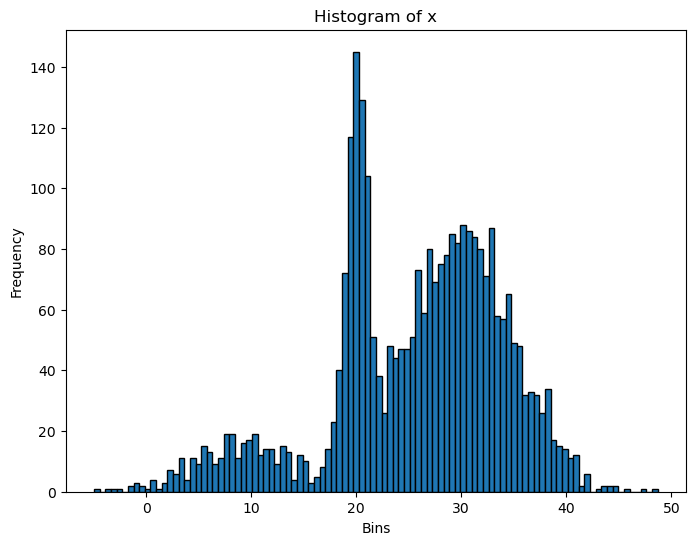

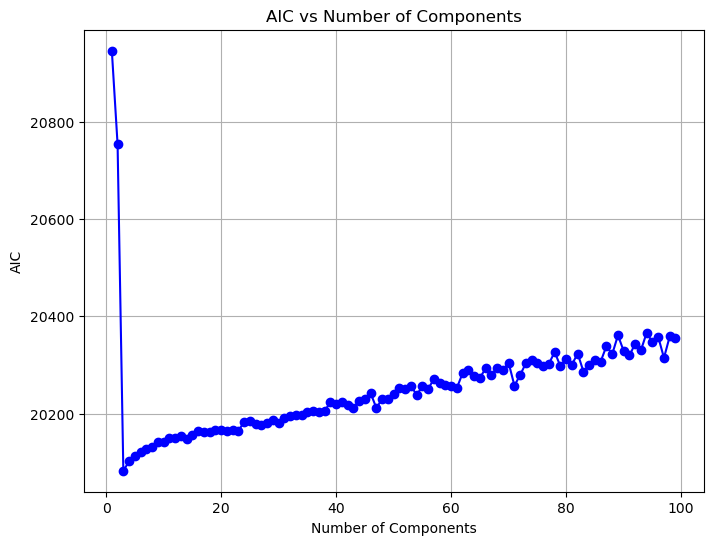

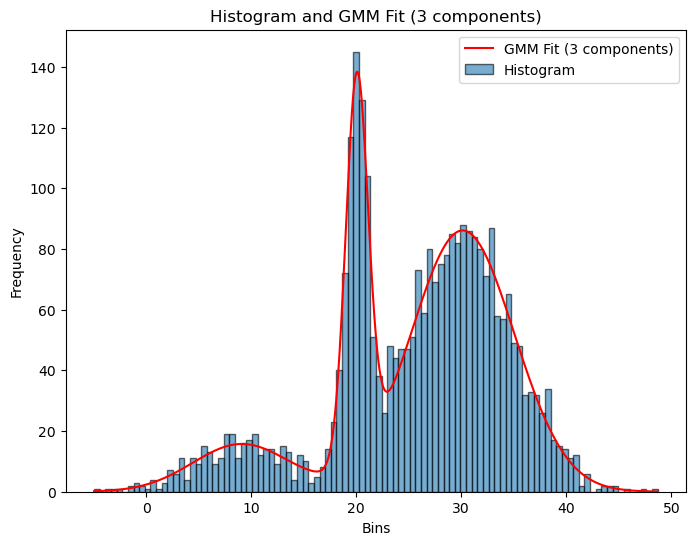

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
   
def load_file(file_path):
    """Carica il contenuto di un file di testo o di un file .npy."""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Il file {file_path} non esiste.")
    
    if file_path.endswith('.npy'):
        return np.load(file_path, allow_pickle=True)

x = load_file('/Users/albertozanelli/Desktop/astrostatistics_bicocca_2025/solutions/formationchannels.npy')



# Calcola l'istogramma
hist, bin_edges = np.histogram(x, bins=100)

# Plot dell'istogramma
plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", align="edge")
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram of x')
plt.show()

list_AIC = []   
for i in range(1, 100):
    mod = GaussianMixture(n_components=i)
    fit = mod.fit(x)
    aic = mod.aic(x)
    list_AIC.append(aic)


# Plotta il valore di AIC per ogni modello
plt.figure(figsize=(8, 6))
plt.plot(range(1, 100), list_AIC, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('AIC')
plt.title('AIC vs Number of Components')
plt.grid(True)
plt.show()

# Fit the Gaussian Mixture Model with 3 components
gmm_3 = GaussianMixture(n_components=3)
gmm_3.fit(x)

# Generate points for plotting the fit
x_values = np.linspace(bin_edges[0], bin_edges[-1], 1000).reshape(-1, 1)
log_density = gmm_3.score_samples(x_values)
density = np.exp(log_density)

# Plot the histogram and the fitted GMM
plt.figure(figsize=(8, 6))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor="black", align="edge", alpha=0.6, label='Histogram')
plt.plot(x_values, density * len(x) * np.diff(bin_edges)[0], color='red', label='GMM Fit (3 components)')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram and GMM Fit (3 components)')
plt.legend()
plt.show()

